In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Activation, Masking, Dense, SimpleRNN, Dropout
from sklearn.metrics import mean_squared_error
import math

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
dataset_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Simple_RNN/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [6]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

Creating a data structure with 60 timesteps and 1 output

In [7]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

### Building and Training the RNN

In [9]:
# SimpleRNN model
model = Sequential()
model.add(SimpleRNN(64, input_shape=(X_train.shape[1], 1), activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae','mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12,609
Trainable params: 12,609
Non-trainable params: 0
_________________________________________________________________


### Fitting the RNN to the Training set

In [10]:
model.fit(X_train, 
          y_train, 
          epochs = 50, 
          batch_size = 32)

Epoch 1/50
38/38 [==============================] - 2s 12ms/step - loss: 0.0395 - mae: 0.1309 - mse: 0.0395
Epoch 2/50
38/38 [==============================] - 0s 11ms/step - loss: 0.0031 - mae: 0.0408 - mse: 0.0031
Epoch 3/50
38/38 [==============================] - 0s 12ms/step - loss: 0.0019 - mae: 0.0317 - mse: 0.0019
Epoch 4/50
38/38 [==============================] - 0s 11ms/step - loss: 0.0017 - mae: 0.0285 - mse: 0.0017
Epoch 5/50
38/38 [==============================] - 0s 11ms/step - loss: 0.0013 - mae: 0.0259 - mse: 0.0013
Epoch 6/50
38/38 [==============================] - 0s 12ms/step - loss: 0.0012 - mae: 0.0246 - mse: 0.0012
Epoch 7/50
38/38 [==============================] - 0s 11ms/step - loss: 0.0011 - mae: 0.0229 - mse: 0.0011
Epoch 8/50
38/38 [==============================] - 0s 12ms/step - loss: 9.0250e-04 - mae: 0.0214 - mse: 9.0250e-04
Epoch 9/50
38/38 [==============================] - 0s 11ms/step - loss: 9.1841e-04 - mae: 0.0220 - mse: 9.1841e-04
Epoch 10/50


### Making the predictions and visualising the results

In [11]:
dataset_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Simple_RNN/Google_Stock_Price_Test.csv')
testing_set = dataset_test.iloc[:, 1:2].values

In [12]:
dataset_total = pd.concat((dataset_train['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

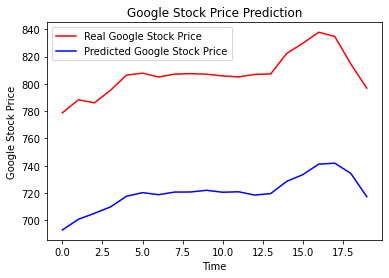

In [13]:
plt.plot(testing_set, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()